<a href="https://colab.research.google.com/github/datagrad/Insurance-Cost-Prediction/blob/main/Insurance_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Insurance Cost Prediction

With this project we will be creating a machine learning model to be used by insurance companies to determine the annual insurance cost of a person based on the attributes like:
1.	Gender
2.	Age
3.	BMI
4.	Number of Children
5.	Smoking Habit
6.	Residence


The complete project will be done in following steps:
1.	Exploring and cleaning the dataset
2.	Data preparation for training
3.	Creating a Machine Learning model
4.	Training the model to fit the data
5.	Making predictions using the trained model



## Import Libraries

In [1]:
# Data analysis and wrangling
import pandas as pd
import numpy as np

# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

#remove warnings
import warnings
warnings.filterwarnings('ignore')

#sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/datagrad/Insurance-Cost-Prediction/main/Insurance_Cost.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
#finding the number of rows and columns of the data.
data.shape

(1338, 7)

## Data Exploration


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


Text(0.5, 1.0, 'Age Distribution')

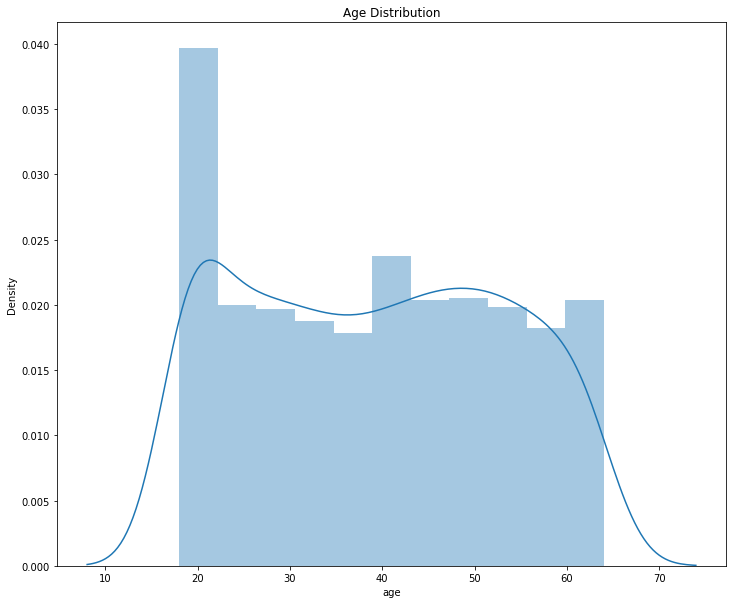

In [6]:
plt.figure(figsize = (12, 10))
sns.distplot(data['age'])
plt.title("Age Distribution")

Text(0.5, 1.0, 'Bmi Distribution')

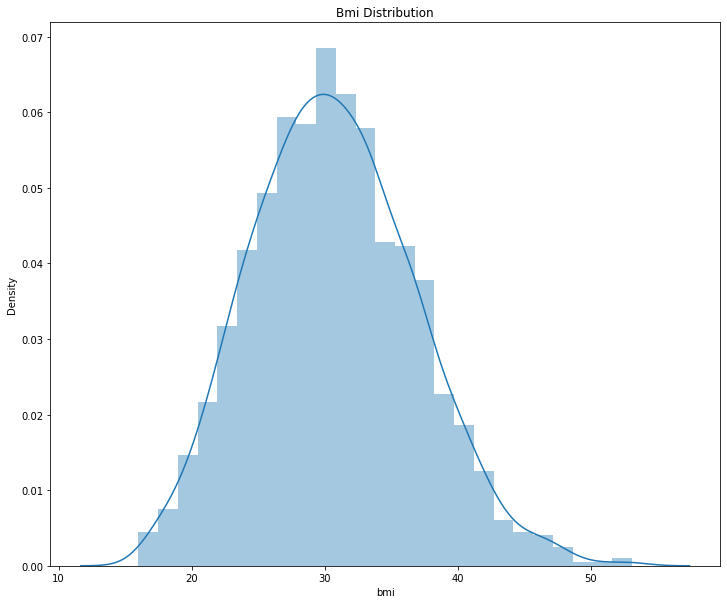

In [7]:
plt.figure(figsize = (12, 10))
sns.distplot(data['bmi'])
plt.title("Bmi Distribution")

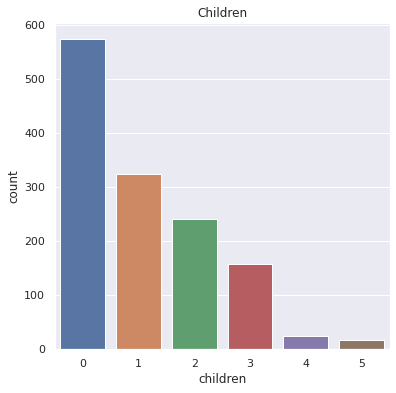

In [8]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(data['children'])
plt.title('Children')
plt.show()

Text(0.5, 1.0, 'Charges Distribution')

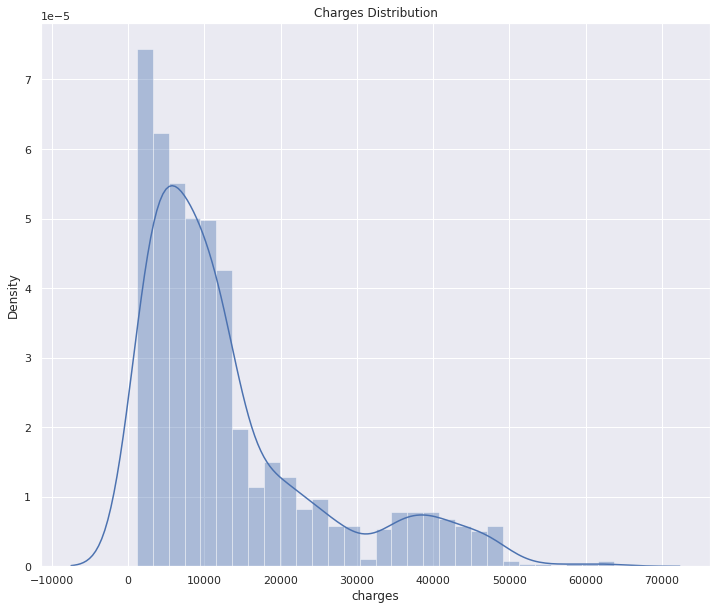

In [9]:

plt.figure(figsize = (12, 10))
sns.distplot(data['charges'])
plt.title("Charges Distribution")

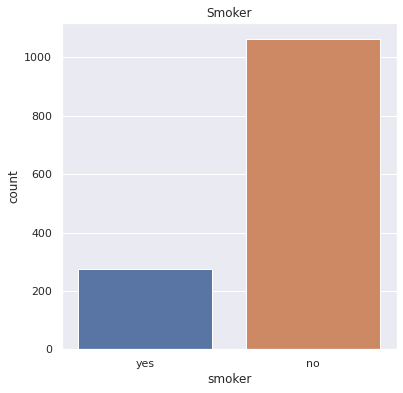

In [10]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(data['smoker'])
plt.title('Smoker')
plt.show()

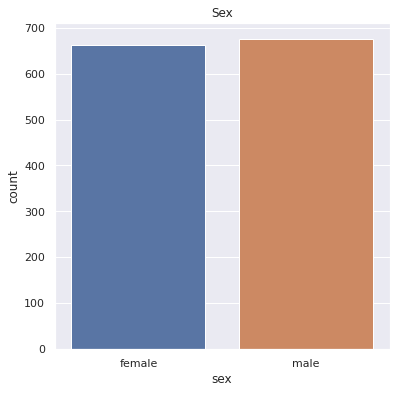

In [11]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(data['sex'])
plt.title('Sex')
plt.show()

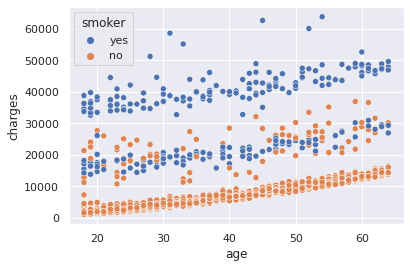

In [12]:
sns.scatterplot(data = data, x = 'age', y = 'charges', hue = 'smoker')

This shows that,the charges increases with age, the older a person is, the higher their insurance. Hence, a 60 year old will pay higher insurance charges than a 20 year old. The graph also shows that, smokers generally have a higher insurance charge than non-smokers.

## Missing Values

In [13]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no missing figures in the data

## Boolean Creatin


We will have to use onehot encoding to be able to get dummy variables for the model.

In [14]:
data.replace({'sex':{'male':0, 'female':1}}, inplace=True)

In [15]:
data.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)

In [16]:
data.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)

In [17]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.9,0,0,1,16884.92
1,18,0,33.8,1,1,0,1725.55
2,28,0,33.0,3,1,0,4449.46
3,33,0,22.7,0,1,3,21984.47
4,32,0,28.9,0,1,3,3866.86


## Model Creation

### Linear Regression

In [18]:
x = data.drop('charges', axis='columns')
y = data['charges']

In [19]:
print(x)

      age  sex   bmi  children  smoker  region
0      19    1  27.9         0       0       1
1      18    0  33.8         1       1       0
2      28    0  33.0         3       1       0
3      33    0  22.7         0       1       3
4      32    0  28.9         0       1       3
...   ...  ...   ...       ...     ...     ...
1333   50    0  31.0         3       1       3
1334   18    1  31.9         0       1       2
1335   18    1  36.9         0       1       0
1336   21    1  25.8         0       1       1
1337   61    1  29.1         0       0       3

[1338 rows x 6 columns]


In [20]:
print(y)

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: charges, Length: 1338, dtype: float64


In [21]:
#split the data into 80% training and 20% testing data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [22]:
print(x.shape, x_train.shape, x_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [23]:
#initialize the linear regression model
reg = linear_model.LinearRegression()

In [24]:
#train the model
reg.fit(x_train, y_train)

LinearRegression()

In [25]:
y_pred = reg.predict(x_test)
print(y_pred)

[ 8604.63162749  7224.64710829 37041.91055913  9600.91843828
 27153.93816218 11110.18188476   347.76142491 17041.24403852
   747.65640922 11376.56844509 28398.75471585  9537.75418448
  5218.91395199 38373.31963402 40193.92548005 37033.4673186
 15166.15908883 35856.41073515  9078.30708835 31653.17645453
  4122.41987769 10389.27615408  2647.13484739  6751.74946118
 11449.07843952 12582.68746839 14760.86811239  6318.26854729
  9587.2321289   2123.82302575  9376.09159569 13216.8797223
  4520.04132026  3601.20742853  4732.25814656 12636.62655935
  2259.29897638  9078.10879076 33446.84784636 32547.28298205
  4175.65300383  4507.46503398 14392.12581094 11600.77793295
  8729.97618288 12362.07650819  5428.52709313  3427.62168083
 35457.72799834  9088.48348016 15766.89725899  2312.11853849
 12496.21925577  1114.95992868 13316.55657479 12184.00473158
  3993.07039008 32340.37530008 13577.10144119 12527.24725226
 14424.27333628 10424.74853597 16604.64980223  7933.87943057
 11465.97618712  4220.1499

In [26]:
#print the actual values
print(y_test)

764      9095.07
887      5272.18
890     29330.98
1293     9301.89
259     33750.29
          ...   
109     47055.53
575     12222.90
535      6067.13
543     63770.43
846      9872.70
Name: charges, Length: 268, dtype: float64


In [27]:
reg.score(x_train,y_train)

0.7413393765020014

In [28]:
#prediction
training_data_pred = reg.predict(x_train)

In [29]:
# R Squared value
R2_train = metrics.r2_score(y_train,training_data_pred)
print('R_squared value ;',R2_train )

R_squared value ; 0.7413393765020014


In [30]:
test_data_pred = reg.predict(x_test)

In [31]:
# R Squared value
R2_test = metrics.r2_score(y_test,test_data_pred)
print('R_squared value ;',R2_test )

R_squared value ; 0.7830013256877739


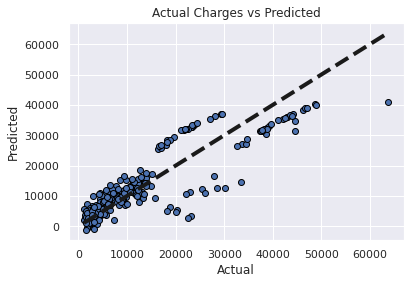

In [32]:
fig, ax = plt.subplots()
ax.scatter(y_test, test_data_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual Charges vs Predicted")
plt.show()

In [33]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.9,0,0,1,16884.92
1,18,0,33.8,1,1,0,1725.55
2,28,0,33.0,3,1,0,4449.46
3,33,0,22.7,0,1,3,21984.47
4,32,0,28.9,0,1,3,3866.86


### Random Forest Regression

In [34]:
x = data.iloc[:, 0:6].values
print(x)
y = data.iloc[:, 6].values

[[19.   1.  27.9  0.   0.   1. ]
 [18.   0.  33.8  1.   1.   0. ]
 [28.   0.  33.   3.   1.   0. ]
 ...
 [18.   1.  36.9  0.   1.   0. ]
 [21.   1.  25.8  0.   1.   1. ]
 [61.   1.  29.1  0.   0.   3. ]]


In [35]:
#split the data into 80% training and 20% testing data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=0)

In [36]:
print(y)

[16884.92  1725.55  4449.46 ...  1629.83  2007.95 29141.36]


In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [39]:
regressor.fit(x, y)  

RandomForestRegressor(random_state=0)

In [40]:
y_pred = regressor.predict(x_test)
print(y_pred)

[10063.5622      9045.4889     45641.5534     13057.7573
  9572.1895      6930.5458      2184.9309     11965.655
  7592.0346      5618.3233      8670.2684     13004.8326
  7693.8999      5653.0753     21111.6507     12371.1415
 13114.9189      5078.6904      6634.5637     33567.1229
 23975.6032     12583.8831     18154.8608     25286.3714
  2621.5395      4872.1309      4000.6716      8183.2362
  3878.8299      9575.2724      8005.496      48723.9141
 13398.9282     17288.8949     15428.7103      3955.3315
  8434.1765     46497.0398     40033.5527      3439.1626
  6139.9937      3110.9486     20510.2518     47824.9567
 36386.1357     18741.9639     16700.93        6939.5943
  4823.8918     18992.1372      3622.9516     17679.422
 24926.6956     46728.2726     20299.7415      4982.3235
  2461.992       9897.2975     12616.1236     14475.9194
  1293.8237     46655.3723     14727.2292     11276.1978
 13358.0405     10036.0412     33060.5431     39695.8284
  3901.0397      9230.6605     14

In [41]:
#print the actual values
print(y_test)

[ 9724.53  8547.69 45702.02 12950.07  9644.25  4500.34  2198.19 11436.74
  7537.16  5425.02  6753.04 10493.95  7337.75  4185.1  18310.74 10702.64
 12523.6   3490.55  6457.84 33475.82 23967.38 12643.38 23045.57 23065.42
  1674.63  4667.61  3732.63  7682.67  3756.62  8413.46  8059.68 48970.25
 12979.36 20630.28 14571.89  4137.52  8347.16 51194.56 40003.33  1880.49
  5458.05  2867.12 20149.32 47496.49 36149.48 26018.95 19749.38  6940.91
  4718.2  22192.44  2899.49 18838.7  23568.27 46255.11 24227.34  3268.85
  2322.62  8827.21 14478.33 13112.6   1253.94 46718.16 13919.82  9630.4
 10736.87  9880.07 32548.34 38746.36  3180.51  8162.72 13041.92 11554.22
 16232.85 13887.97 13012.21 13217.09  7147.11  7731.43 20296.86 47403.88
 11658.38 45863.21  2055.32  7441.05 41034.22 18972.5   3410.32  2699.57
 12333.83 36837.47  6334.34 10214.64 17878.9   8515.76  4518.83  5148.55
 42303.69 38998.55  5327.4  10602.39  1824.29  5377.46  4349.46 37742.58
 32787.46  3353.47 10577.09  3556.92 11944.59 52590.

In [42]:
regressor.score(x,y)

0.9766382908892518

In [43]:
data.head(15)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.9,0,0,1,16884.92
1,18,0,33.8,1,1,0,1725.55
2,28,0,33.0,3,1,0,4449.46
3,33,0,22.7,0,1,3,21984.47
4,32,0,28.9,0,1,3,3866.86
5,31,1,25.7,0,1,0,3756.62
6,46,1,33.4,1,1,0,8240.59
7,37,1,27.7,3,1,3,7281.51
8,37,0,29.8,2,1,2,6406.41
9,60,1,25.8,0,1,3,28923.14


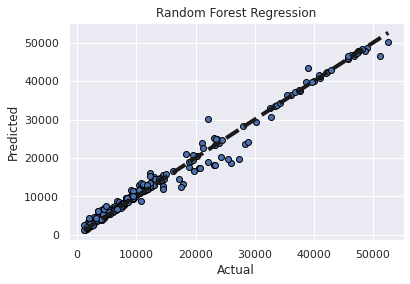

In [44]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Random Forest Regression")
plt.show()

## Result
The Random Forest Regressor gave near accurate figures, hence, it was the best performance.The Random Forest Regressor gave an R_squared of 97.6%. It means, 97.6% of the observed variation can be explained by the model's inputs.
The Linear Regression had an R_squared of 74%, which means, 74% of the observed variation can be explained by the model's inputs.